In [1]:
#IMPORTING THE NECCESSARY THINGS
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# IMPORTING ALL THE LIBRARIES WHICH IS IMPORANT
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [5]:
from keras.utils import np_utils

Using TensorFlow backend.


In [6]:
y_train=np_utils.to_categorical(Y_train)
y_test=np_utils.to_categorical(Y_test)
x_train=X_train.reshape(-1,784)
x_test=X_test.reshape(-1,784)
#RESHAPING ALL OF THEM ACCORDING T

In [7]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000, 10)
(10000, 10)


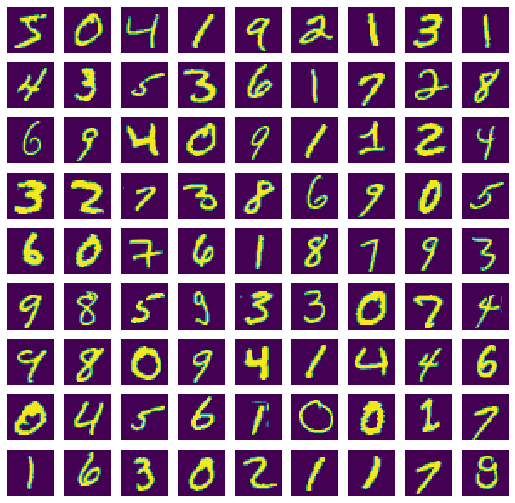

In [8]:
# NOW PLOT ALL THE IMAGES
fig=plt.figure(figsize=(9,9))
for i in range(81):
  ax1=fig.add_subplot(9,9,i+1)
  ax1.imshow(X_train[i])
  plt.axis("off")
plt.show()

In [9]:
n_pixels=784
channel=1
n_width=28
n_height=28

n_conv1=1
n_conv1_k=5
max_pool_1=2

n_conv_2=1
n_conv2_k=5
max_pool_2=2

stride1=1
stride2=1

n_hidden=1
n_output=10

yess=int(n_width/(max_pool_1*max_pool_2))*int(n_height/(max_pool_1*max_pool_2))*n_conv_2

In [10]:
wh={
    
    'w1':tf.Variable(tf.random_normal([n_conv1_k,n_conv1_k,channel,n_conv1])),
    'w2':tf.Variable(tf.random_normal([n_conv2_k,n_conv2_k,n_conv1,n_conv_2])),
    'wh':tf.Variable(tf.random_normal([yess,n_hidden])),
    'wo':tf.Variable(tf.random_normal([n_hidden,n_output]))
}

bh={
    
    'b1':tf.Variable(tf.random_normal([n_conv1])),
    'b2':tf.Variable(tf.random_normal([n_conv_2])),
    'bh':tf.Variable(tf.random_normal([n_hidden])),
    'bo':tf.Variable(tf.random_normal([n_output]))
    

}

In [11]:
def conv(x,weights,bias,stride1):
    out=tf.nn.conv2d(x,weights,padding="SAME",strides=[1,stride1,stride1,1])
    out=tf.nn.bias_add(out,bias)
    out=tf.nn.relu(out)
    return out

def pool(x,k):
    return tf.nn.max_pool(x,ksize=[1,k,k,1],strides=[1,k,k,1],padding="SAME")

In [12]:
def cnn(x,weights,biases,keep_prob):
    x=tf.reshape(x,shape=[-1,28,28,1])
  #IF YOU KNOW TWO OF THEM YOU CAN EASILY RESHAPE THE LAST ARGUMENT
  #APPLY CONVOLUTION LAYER ON INPUT
    conv1=conv(x,weights['w1'],biases['b1'],stride1)
    max_answer=pool(conv1,max_pool_1)
  # THIS IS FOR THE FIRST LAYER

  # NOW SECOND LAYER
    conv2=conv(max_answer,weights['w2'],biases['b2'],stride2)
    max_answer1=pool(conv2,max_pool_2)

  # THIS IS FOR THE SECOND LAYER

  #NOW FLATTEN IT
    real=tf.reshape(max_answer1,shape=[-1,yess])
    output_before=tf.add(tf.matmul(real,weights['wh']),biases['bh'])
    output_ac=tf.nn.relu(output_before)
    output_ac=tf.nn.dropout(output_ac,keep_prob)
  #THE FINAL LAYER
    output=tf.add(tf.matmul(output_ac,weights['wo']),biases['bo'])
  #HERE I AM NOT APPLYING ANY ACTIVATION FUNCTION I AM JUST RETURNING IT
    return output

In [13]:
x=tf.placeholder('float32',[None,n_pixels])
y=tf.placeholder(tf.int32,[None,n_output])
keep_prob=tf.placeholder('float')
pred=cnn(x,wh,bh,keep_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [15]:
# NOW YOU HAVE GOT THE FORWARD PREDICTION GET THE COST FUNCTION
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=pred,labels=y))

In [16]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
costt=optimizer.minimize(cost)

In [ ]:
for i in range(1):
    cost,_=sess.run([cost,costt],feed_dict={x:x_train,y:y_train,keep_prob:0.8})
print(cost)
# IT IS PREFERED TO USE THIS IN A BETTER LAPTOP for range(25)

In [ ]:
#WHATEVER ANSWER YOU GET IT

In [ ]:
#IT WILL BE MINIMIMIZED
predictions=tf.argmax(pred,1)
true_labels=tf.argmax(y,1)

correct_predictions=tf.equal(predictions,true_labels)
prediction,correct_pred=sess.run([predictions,correct_predictions],feed_dict={x:x_test,y:y_tes,keep_prob:1.0})
correct_pred.sum()

In [ ]:
# IT IS BETTER TO RUN IN HIGHER VERSIONS